Bibliothèques

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

Génération de données synthétiques

In [41]:
# 1. Création de données synthétiques
np.random.seed(42)
data_size = 1000
# Variables indépendantes
types_maintenance = np.random.choice(["préventive", "corrective"], data_size, p=[0.7, 0.3])
complexité = np.random.randint(1, 10, data_size)  # 1 = faible, 10 = très élevée
effectif = np.random.randint(5, 50, data_size)  # Effectif mobilisé
ressources_disponibles = np.random.rand(data_size)  # 0.0 à 1.0 pour refléter la disponibilité

# Durée (target) : générée en fonction des variables avec bruit ajouté
durée = (
    5 * (types_maintenance == "corrective").astype(int)
    + 2 * complexité
    - 0.1 * effectif
    + 10 * (1 - ressources_disponibles)
)

Création du dataset

In [42]:
# DataFrame
df = pd.DataFrame({
"Type_Maintenance": types_maintenance,
"Complexité": complexité,
"Effectif": effectif,
"Ressources_Disponibles": ressources_disponibles,
"Durée": durée
})

Visualisation du dataset

In [43]:
df.head()

,Type_Maintenance,Complexité,Effectif,Ressources_Disponibles,Durée
0,préventive,8,44,0.866548,12.934520
1,corrective,3,39,0.571809,11.381908
2,corrective,8,36,0.907200,18.328002
3,préventive,5,46,0.942984,5.970162
4,préventive,1,38,0.422385,3.976155


Traitement des variables et initialisation des datasets

In [44]:
#One-Hot Encoding vs Label Encoding vs Ordinal Encoding)
df = pd.get_dummies(df, columns=["Type_Maintenance"], drop_first=True)
# 2. Division des données en train/test
X = df.drop(columns=["Durée"])
y = df["Durée"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)


In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 29 to 102
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Complexité                   800 non-null    int64  
 1   Effectif                     800 non-null    int64  
 2   Ressources_Disponibles       800 non-null    float64
 3   Type_Maintenance_préventive  800 non-null    bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 25.8 KB


Entraînement du modèle 

In [46]:
# 3. Entraînement du modèle
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5,
random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=5, random_state=42)

Evaluation 

In [47]:
# 4. Évaluation du modèle
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")  


Mean Absolute Error: 0.31
R2 Score: 1.00


Warning SURAPPRENTISSAGE : relation linéaire trop simple, absence de bruit, dataset limité

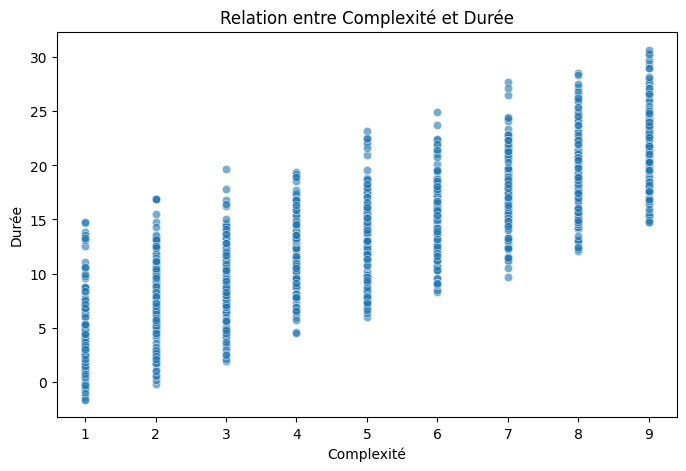

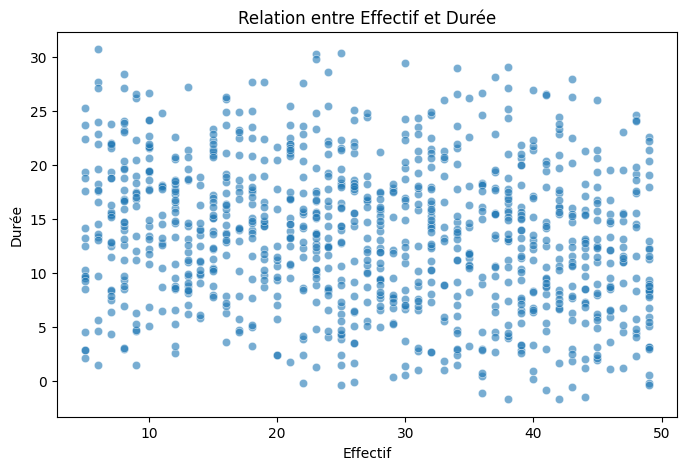

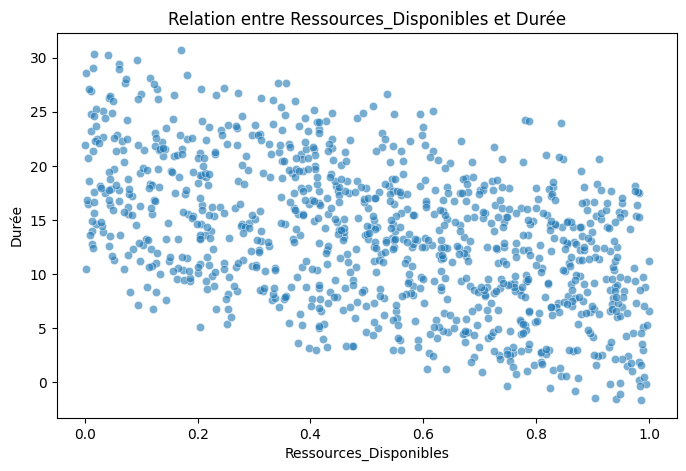

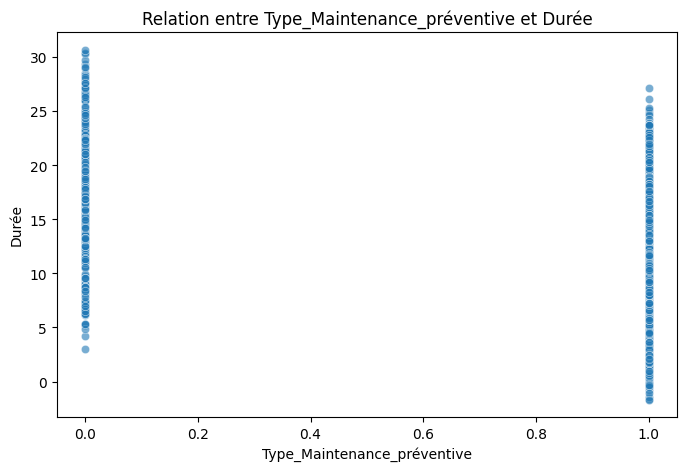

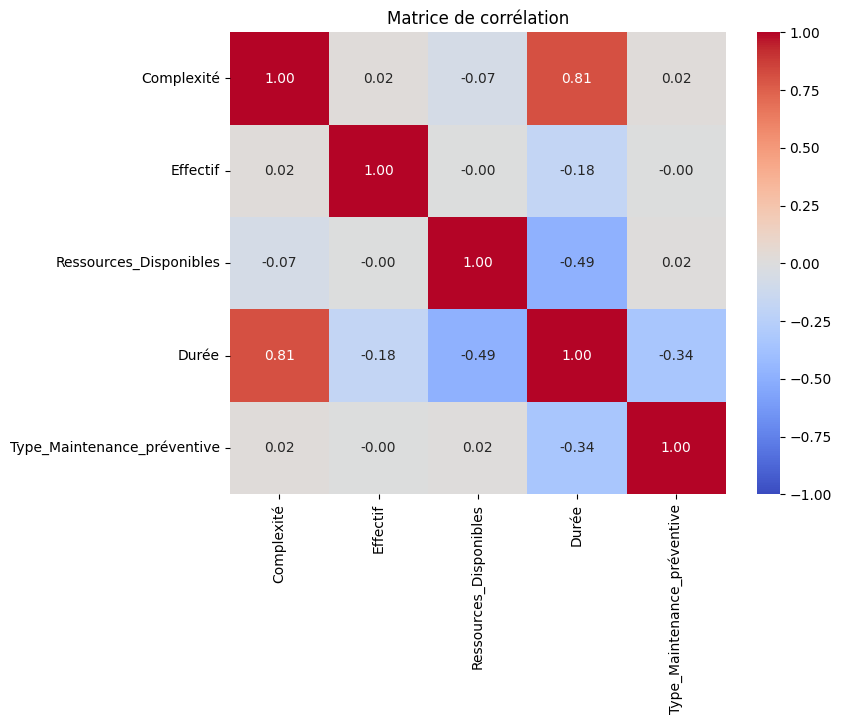

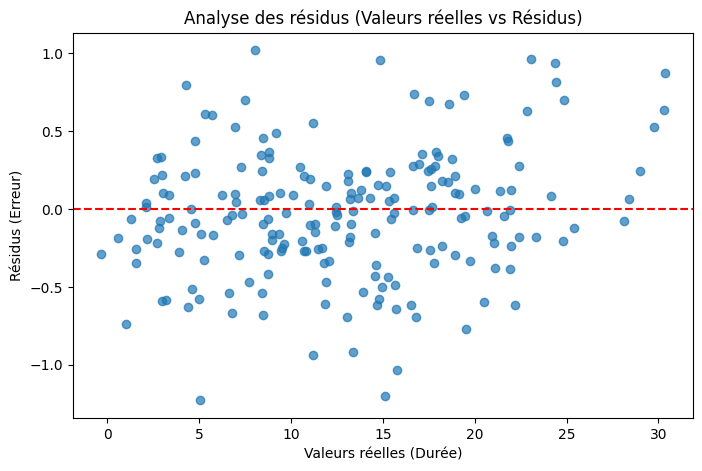

In [ ]:
# Visualisation des relations entre les variables indépendantes et la cible
import seaborn as sns

# 1. Visualiser la relation entre chaque variable indépendante et la cible
features = ["Complexité", "Effectif", "Ressources_Disponibles", "Type_Maintenance_préventive"]

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y="Durée", alpha=0.6)
    plt.title(f"Relation entre {feature} et Durée")
    plt.xlabel(feature)
    plt.ylabel("Durée")
    plt.show()

# 2. Matrice de corrélation (pour les variables numériques)
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()

# 3. Analyse des résidus
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Analyse des résidus (Valeurs réelles vs Résidus)")
plt.xlabel("Valeurs réelles (Durée)")
plt.ylabel("Résidus (Erreur)")
plt.show()


Visualisation pred vs réelles

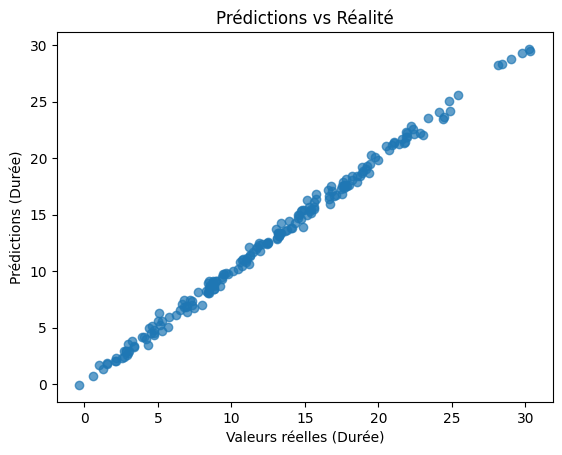

In [49]:
# 5. Visualisation des prédictions vs valeurs réelles
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valeurs réelles (Durée)")
plt.ylabel("Prédictions (Durée)")
plt.title("Prédictions vs Réalité")
plt.show()

Ajout du bruit pour éviter le surapprentissage ou des relations linéaires trop simples

Mean Absolute Error: 4.38
R2 Score: 0.60


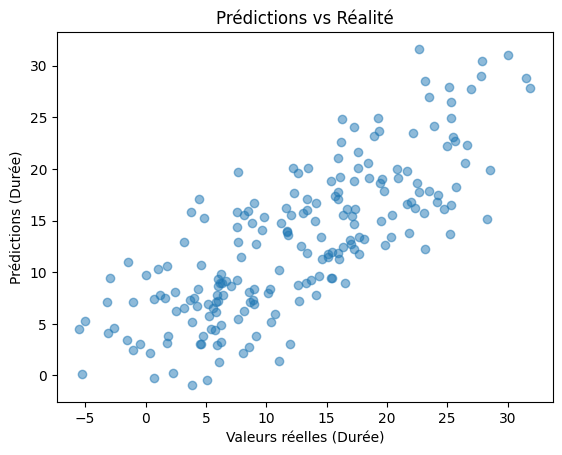

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. Création de données synthétiques
np.random.seed(42)
data_size = 1000

# Variables indépendantes
types_maintenance = np.random.choice(["préventive", "corrective"], data_size, p=[0.7, 0.3])
complexité = np.random.randint(1, 10, data_size)  # 1 = faible, 10 = très élevée
effectif = np.random.randint(5, 50, data_size)  # Effectif mobilisé
ressources_disponibles = np.random.rand(data_size)  # 0.0 à 1.0 pour refléter la disponibilité

# Durée (target) : générée en fonction des variables avec bruit ajouté
durée = (
    5 * (types_maintenance == "corrective").astype(int)
    + 2 * complexité
    - 0.1 * effectif
    + 10 * (1 - ressources_disponibles)
    + np.random.normal(0, 5, data_size)  # Bruit aléatoire avec une variance ajustée
)

# DataFrame
df = pd.DataFrame({
    "Type_Maintenance": types_maintenance,
    "Complexité": complexité,
    "Effectif": effectif,
    "Ressources_Disponibles": ressources_disponibles,
    "Durée": durée
})

# Encodage de la variable catégorielle
df = pd.get_dummies(df, columns=["Type_Maintenance"], drop_first=True)

# 2. Division des données en train/test
X = df.drop(columns=["Durée"])
y = df["Durée"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# 3. Entraînement du modèle
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 4. Évaluation du modèle
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# 5. Visualisation des prédictions vs valeurs réelles
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeurs réelles (Durée)")
plt.ylabel("Prédictions (Durée)")
plt.title("Prédictions vs Réalité")
plt.show()


Recherche des hyperparamètres 

In [ ]:
from sklearn.model_selection import GridSearchCV
# Définir les hyperparamètres à tester
param_grid = {
'n_estimators': [50, 100, 200],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7],
'subsample': [0.8, 1.0]
}
# Configurer le Grid Search
grid_search = GridSearchCV(
GradientBoostingRegressor(random_state=42),
param_grid,
cv=5, # Validation croisée
scoring='neg_mean_absolute_error',
verbose=2,
n_jobs=-1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure performance (MAE) : {-grid_search.best_score_:.2f}")

Relations entre les variables

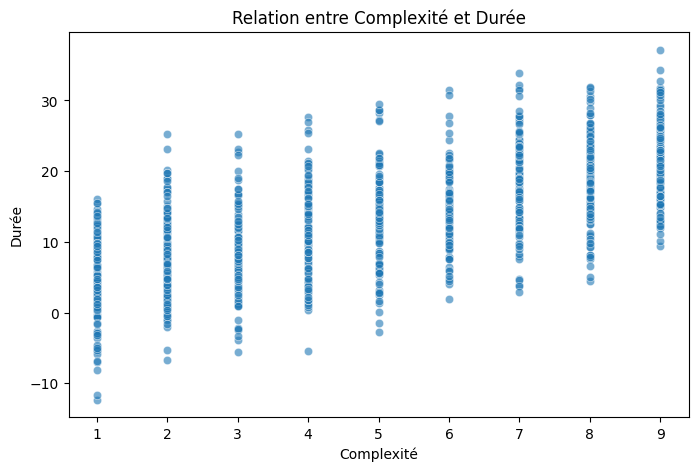

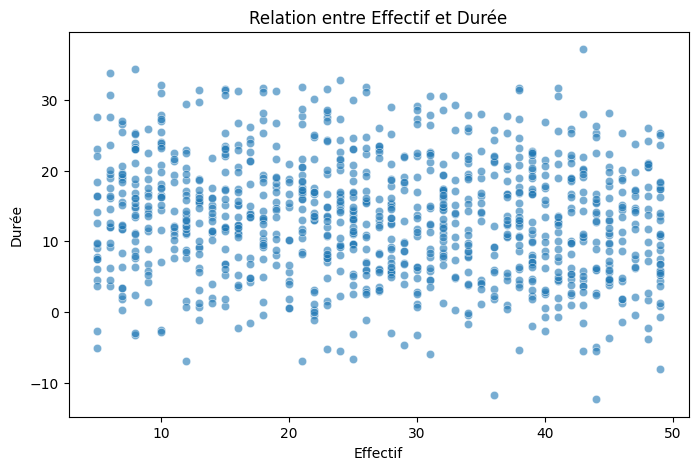

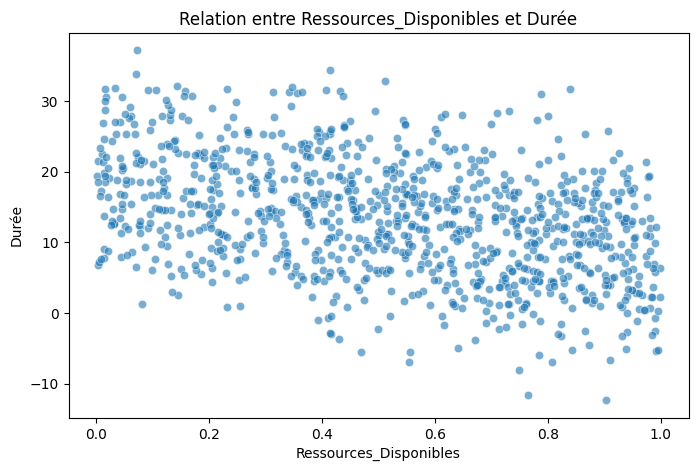

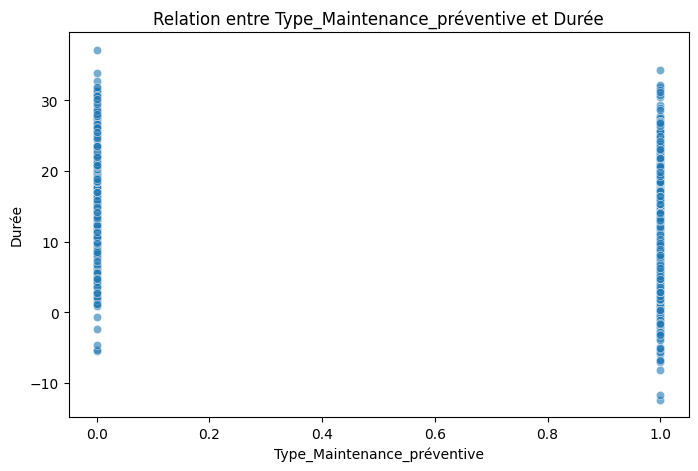

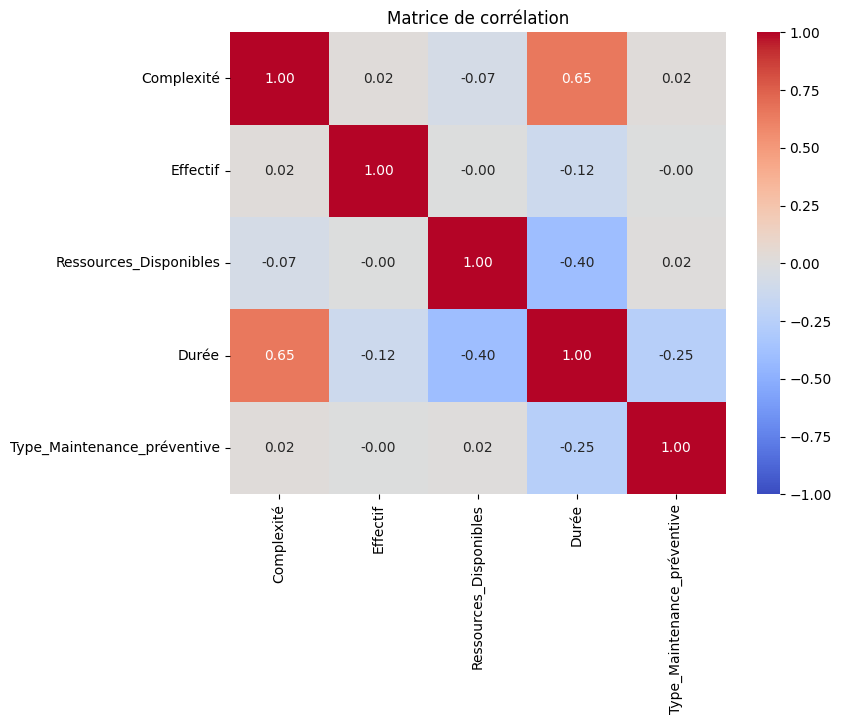

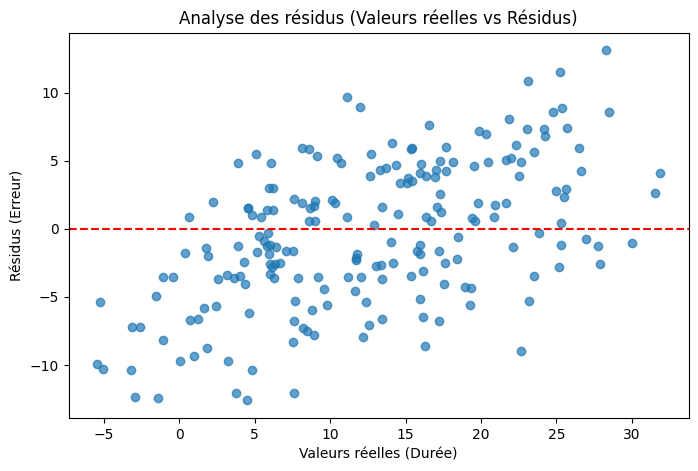

In [51]:
# Visualisation des relations entre les variables indépendantes et la cible
import seaborn as sns

# 1. Visualiser la relation entre chaque variable indépendante et la cible
features = ["Complexité", "Effectif", "Ressources_Disponibles", "Type_Maintenance_préventive"]

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature, y="Durée", alpha=0.6)
    plt.title(f"Relation entre {feature} et Durée")
    plt.xlabel(feature)
    plt.ylabel("Durée")
    plt.show()

# 2. Matrice de corrélation (pour les variables numériques)
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()

# 3. Analyse des résidus
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Analyse des résidus (Valeurs réelles vs Résidus)")
plt.xlabel("Valeurs réelles (Durée)")
plt.ylabel("Résidus (Erreur)")
plt.show()


Feature Importance

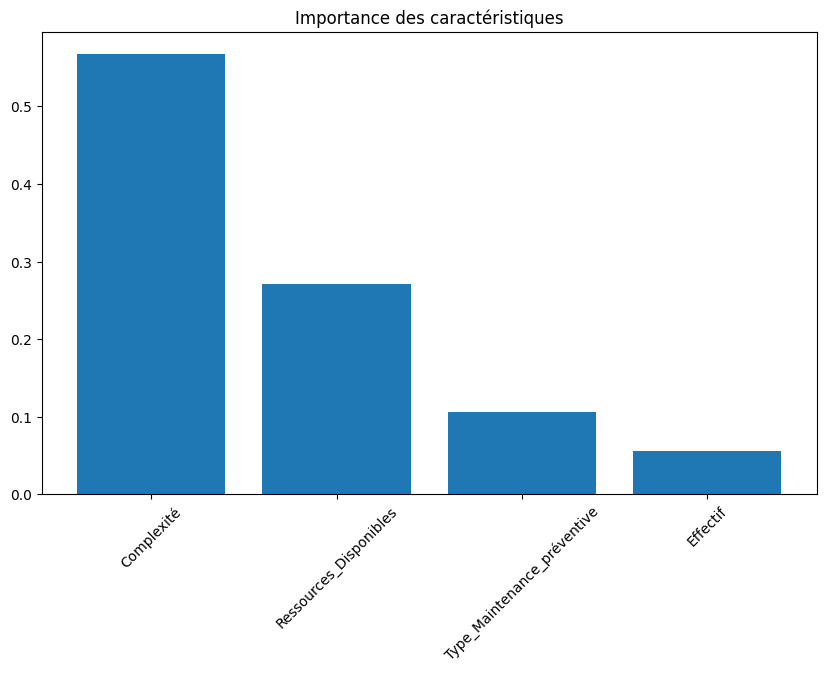

In [52]:
importances = best_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
# Visualisation
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=45)
plt.title("Importance des caractéristiques")
plt.show()

Distribution des variables 

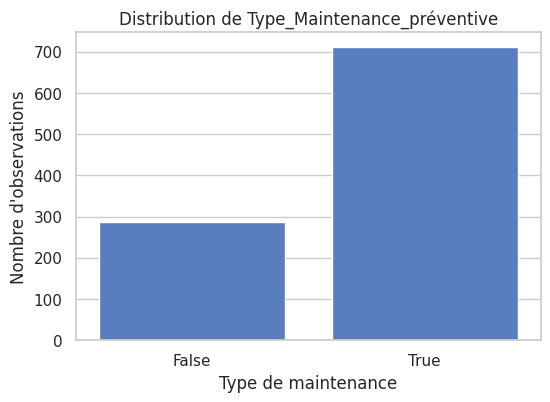

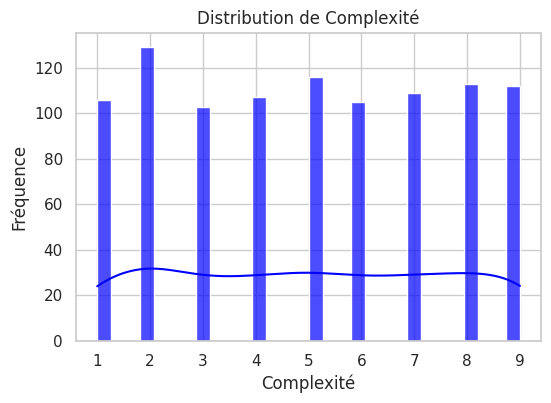

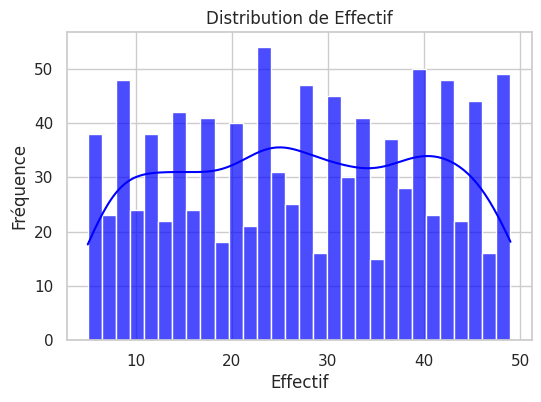

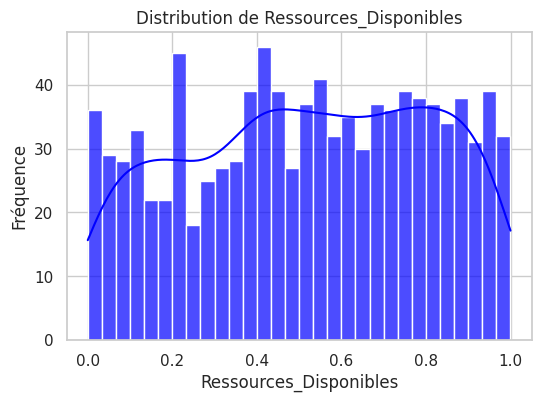

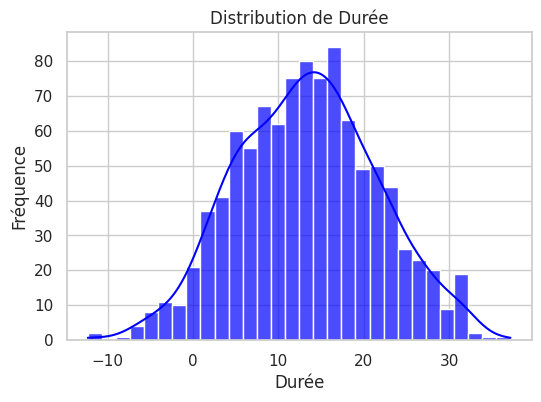

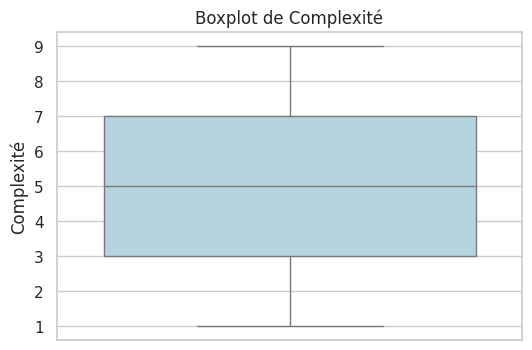

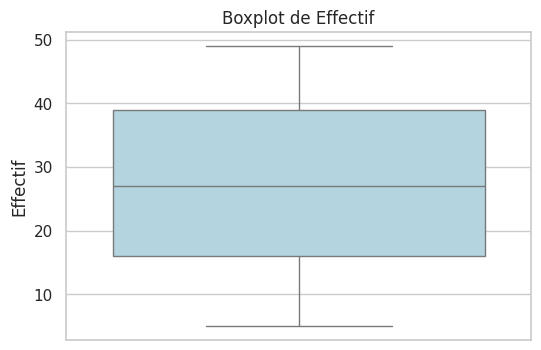

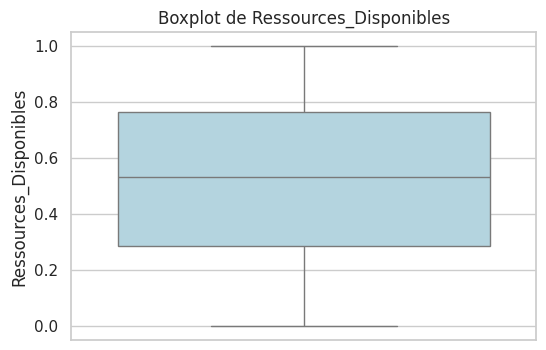

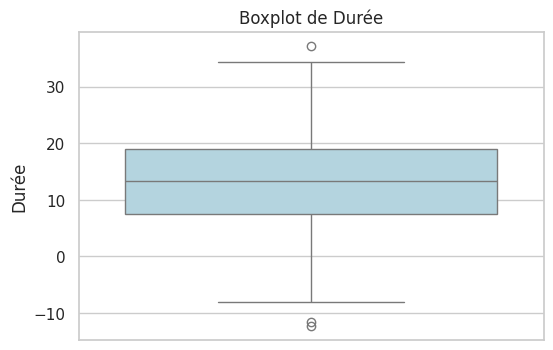

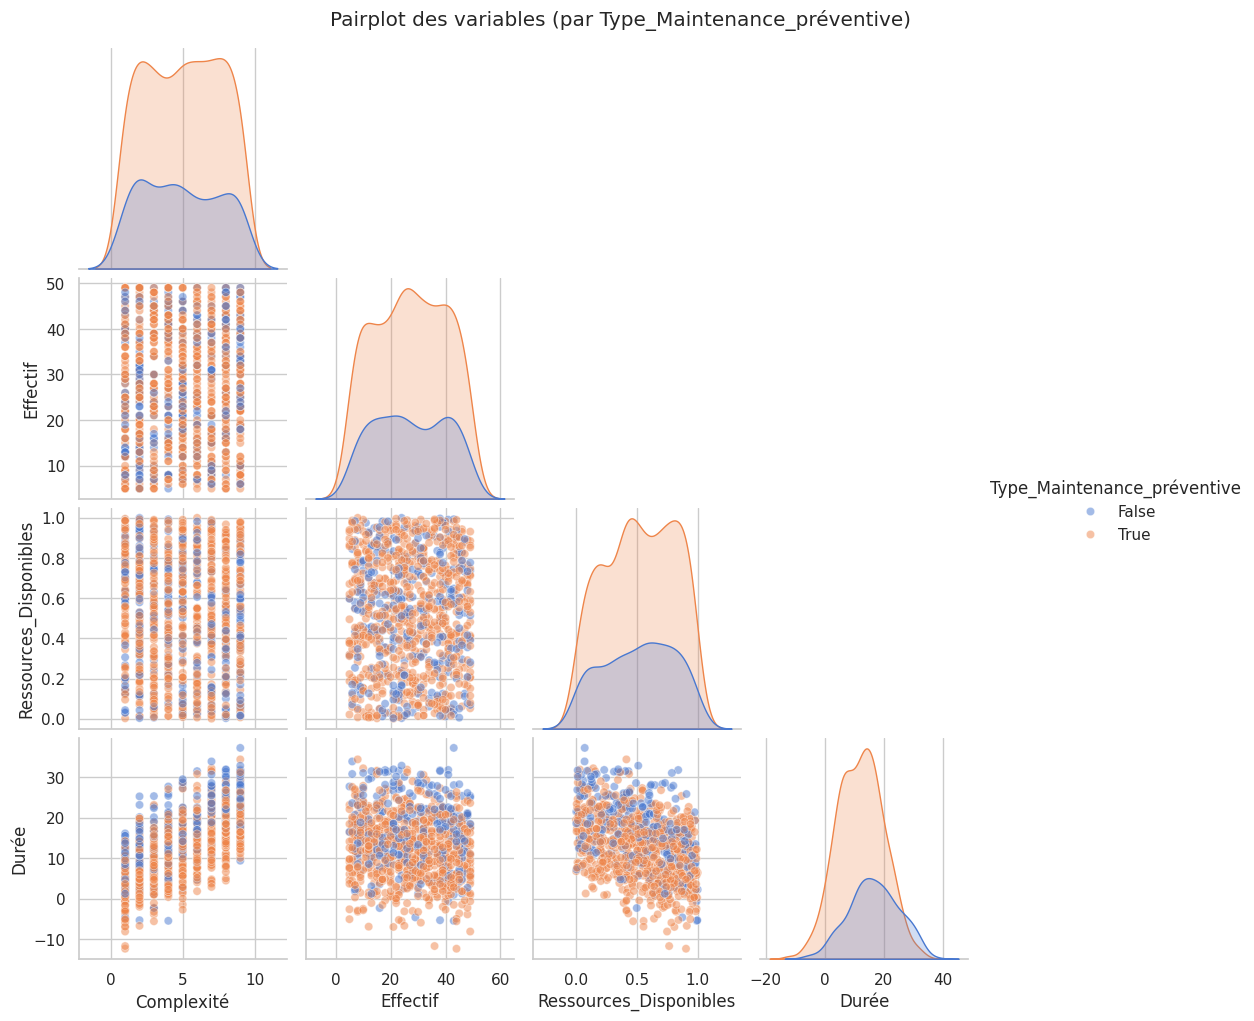

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paramètres de style pour Seaborn
sns.set_theme(style="whitegrid", palette="muted")

# 1. Distribution de la variable catégorielle "Type_Maintenance"
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Type_Maintenance_préventive")
plt.title("Distribution de Type_Maintenance_préventive")
plt.xlabel("Type de maintenance")
plt.ylabel("Nombre d'observations")
plt.show()

# 2. Distribution des variables numériques
num_vars = ["Complexité", "Effectif", "Ressources_Disponibles", "Durée"]

for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, kde=True, bins=30, color="blue", alpha=0.7)
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Fréquence")
    plt.show()

# 3. Boxplot pour détecter les éventuels outliers des variables numériques
for var in num_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, y=var, color="lightblue")
    plt.title(f"Boxplot de {var}")
    plt.ylabel(var)
    plt.show()

# 4. Pairplot pour visualiser les relations et distributions entre variables
sns.pairplot(df, hue="Type_Maintenance_préventive", diag_kind="kde", corner=True, plot_kws={'alpha':0.5})
plt.suptitle("Pairplot des variables (par Type_Maintenance_préventive)", y=1.02)
plt.show()
